In [89]:

import requests
import pandas as pd
import pickle
from matplotlib import pyplot as plt
import numpy as np

In [90]:
def grab_year(year):
    # Saves financial tables from a government website
    # The result is returned
    url = 'https://www.treasury.gov/resource-center/data-chart-center/interest-rates/pages/TextView.aspx?data=yieldYear&year='
    url_year = url + str(year)
    raw_html = requests.get(url_year).content
    df = pd.read_html(raw_html)[1]
    # df.to_csv('data_'+str(year)+'.csv') #another saving option
    return df

In [91]:
def scrape():
    # Collects the tables for a range of years
    # Saves the result as a pickle
    # Minimize the impact on the website by accessing the data only once
    # and saving it in a pickle file.
    data = [ grab_year(i) for i in range(2000,2005) ]
    with open('data.p', 'wb') as handle:
        pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [92]:
def load_data(fn):
    # Load the pickle file from a filename
    # Return that
    df_list = pd.read_pickle(fn)
    return df_list

In [121]:
def get_date_changes(dates):
    # Returns a list of tuples from the dataframe dates column
    # The tuple will be [index of change, last two digits of year]
    #   The type will be a List[int, string]
    # Remember to include the start and end years
    
    df1 = pd.DataFrame([],columns=['indx','Year','Year_int'])
    d = [i.split('/')[2] for i in t]
    for id,val in enumerate(d):
        df1.loc[len(df1)] = [id,val,int(val)]

    df2 = df1.groupby('Year_int').min()
    return [tuple(i) for i in df2[['indx','Year']].values] #tolist()

In [177]:
def plot_data(cols, r):
    # Plot each of the columns in a loop using plt
    # Add the column name as a label
    r['Date'] = pd.to_datetime(r['Date'])
    for col in cols[1:]:
        plt.plot(r['Date'],r[col],label=col)
        plt.legend()

In [171]:
cols = r[data[0].columns[0]].values

In [172]:
data = load_data('data.p')
# Concatenate data frames and set NaN values to -1 with fillna
r = pd.concat(data).fillna(-1)
# Get column names
cols = data[0].columns

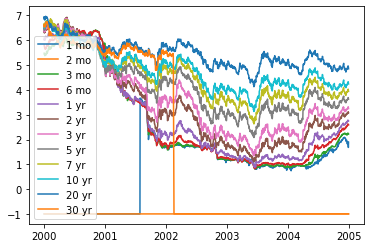

In [178]:
plot_data(cols,r)

In [174]:
dc = get_date_changes(r[cols[0]].values)

In [175]:
dc

[(0, '00'), (251, '01'), (499, '02'), (749, '03'), (999, '04')]

In [176]:
r

Date  1 mo  2 mo  3 mo  6 mo  1 yr  2 yr  3 yr  5 yr  7 yr  10 yr  \
0   2000-01-03 -1.00  -1.0  5.48  5.81  6.09  6.38  6.42  6.50  6.65   6.58   
1   2000-01-04 -1.00  -1.0  5.43  5.75  6.00  6.30  6.34  6.40  6.56   6.49   
2   2000-01-05 -1.00  -1.0  5.44  5.74  6.05  6.38  6.43  6.51  6.68   6.62   
3   2000-01-06 -1.00  -1.0  5.41  5.69  6.03  6.35  6.39  6.46  6.63   6.57   
4   2000-01-07 -1.00  -1.0  5.38  5.66  6.00  6.31  6.35  6.42  6.58   6.52   
..         ...   ...   ...   ...   ...   ...   ...   ...   ...   ...    ...   
245 2004-12-27  1.90  -1.0  2.26  2.63  2.78  3.07  3.26  3.65  3.99   4.30   
246 2004-12-28  1.88  -1.0  2.25  2.62  2.77  3.08  3.27  3.66  4.00   4.31   
247 2004-12-29  1.76  -1.0  2.22  2.60  2.77  3.12  3.32  3.69  4.03   4.33   
248 2004-12-30  1.68  -1.0  2.22  2.59  2.76  3.10  3.27  3.64  3.97   4.27   
249 2004-12-31  1.89  -1.0  2.22  2.59  2.75  3.08  3.25  3.63  3.94   4.24   

     20 yr  30 yr  
0     6.94   6.61  
1     6.84   6.53  
2     6.95   6.64  
3     6.86   6.58  
4     6.82   6.55  
..     ...    ...  
245   4.95  -1.00  
246   4.94  -1.00  
247   4.96  -1.00  
248   4.92  -1.00  
249   4.85  -1.00  

[1249 rows x 13 columns]

In [181]:
r.head()

Date  1 mo  2 mo  3 mo  6 mo  1 yr  2 yr  3 yr  5 yr  7 yr  10 yr  \
0 2000-01-03  -1.0  -1.0  5.48  5.81  6.09  6.38  6.42  6.50  6.65   6.58   
1 2000-01-04  -1.0  -1.0  5.43  5.75  6.00  6.30  6.34  6.40  6.56   6.49   
2 2000-01-05  -1.0  -1.0  5.44  5.74  6.05  6.38  6.43  6.51  6.68   6.62   
3 2000-01-06  -1.0  -1.0  5.41  5.69  6.03  6.35  6.39  6.46  6.63   6.57   
4 2000-01-07  -1.0  -1.0  5.38  5.66  6.00  6.31  6.35  6.42  6.58   6.52   

   20 yr  30 yr  
0   6.94   6.61  
1   6.84   6.53  
2   6.95   6.64  
3   6.86   6.58  
4   6.82   6.55

In [184]:
r['Date'] = pd.to_datetime(r['Date'])

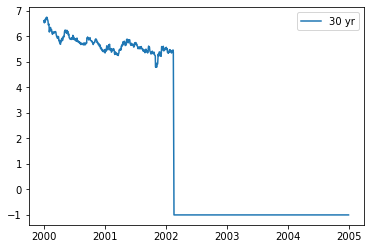

In [196]:
plt.plot(r['Date'],r['30 yr'],label=col)
plt.legend()
# plt.xticks([i for i,_ in dc])
plt.show()

In [ ]:
def plot_finalize(dc, r):
    # Set the xticks to the values from the date changes variable
    # Set x ticks to be every 1
    # Set the axis range to be reasonable
    #     Lower left should be the origin
    # Turn the grid on
    # Show the legend
    # Show (for testing)
    # Save (for submitting)
    
    pass

In [197]:
dc

[(0, '00'), (251, '01'), (499, '02'), (749, '03'), (999, '04')]

In [93]:
scrape()

In [94]:
load_data('data.p')

[         Date  1 mo  2 mo  3 mo  6 mo  1 yr  2 yr  3 yr  5 yr  7 yr  10 yr  \
 0    01/03/00   NaN   NaN  5.48  5.81  6.09  6.38  6.42  6.50  6.65   6.58   
 1    01/04/00   NaN   NaN  5.43  5.75  6.00  6.30  6.34  6.40  6.56   6.49   
 2    01/05/00   NaN   NaN  5.44  5.74  6.05  6.38  6.43  6.51  6.68   6.62   
 3    01/06/00   NaN   NaN  5.41  5.69  6.03  6.35  6.39  6.46  6.63   6.57   
 4    01/07/00   NaN   NaN  5.38  5.66  6.00  6.31  6.35  6.42  6.58   6.52   
 ..        ...   ...   ...   ...   ...   ...   ...   ...   ...   ...    ...   
 246  12/22/00   NaN   NaN  5.27  5.52  5.25  5.10  5.02  4.93  5.07   5.02   
 247  12/26/00   NaN   NaN  5.85  5.76  5.31  5.10  5.00  4.92  5.09   5.04   
 248  12/27/00   NaN   NaN  5.75  5.68  5.32  5.10  5.04  4.99  5.17   5.11   
 249  12/28/00   NaN   NaN  5.87  5.79  5.40  5.18  5.12  5.02  5.21   5.13   
 250  12/29/00   NaN   NaN  5.89  5.70  5.32  5.11  5.06  4.99  5.16   5.12   
 
      20 yr  30 yr  
 0     6.94   6.61  
 1     6

In [95]:
def get_date_changes(dates):
    # Returns a list of tuples from the dataframe dates column
    # The tuple will be [index of change, last two digits of year]
    #   The type will be a List[int, string]
    # Remember to include the start and end years
    
    pass

SyntaxError: invalid syntax (<ipython-input-95-9375ff3f049a>, line 6)

In [96]:
data = load_data('data.p')
# Concatenate data frames and set NaN values to -1 with fillna
r = pd.concat(data).fillna(-1)

In [120]:
r[data[0].columns[0]].values

array(['01/03/00', '01/04/00', '01/05/00', ..., '12/29/04', '12/30/04',
       '12/31/04'], dtype=object)

In [ ]:
df1 = pd.DataFrame([],columns=['indx','Year','Year_int'])
d = [i.split('/')[2] for i in t]
for id,val in enumerate(d):
    df1.loc[len(df1)] = [id,val,int(val)]
    
df2 = df1.groupby('Year_int').min()
[tuple(i) for i in df2[['indx','Year']].values] #tolist()

In [106]:
df1 = pd.DataFrame([],columns=['indx','Year','Year_int'])
t = r[data[0].columns[0]].values
d = [i.split('/')[2] for i in t]
for id,val in enumerate(d):
    df1.loc[len(df1)] = [id,val,int(val)]

In [107]:
df1.head()

indx Year Year_int
0    0   00        0
1    1   00        0
2    2   00        0
3    3   00        0
4    4   00        0

In [108]:
df2 = df1.groupby('Year_int').min()

In [119]:
[tuple(i) for i in df2[['indx','Year']].values] #tolist()

[(0, '00'), (251, '01'), (499, '02'), (749, '03'), (999, '04')]

In [ ]:
# Get column names
cols = data[0].columns
# Get times the year changed
dc = get_date_changes(r[cols[0]].values)

In [131]:
r['Date'] = pd.to_datetime(r['Date'])

In [133]:
r.dtypes

Date     datetime64[ns]
1 mo            float64
2 mo            float64
3 mo            float64
6 mo            float64
1 yr            float64
2 yr            float64
3 yr            float64
5 yr            float64
7 yr            float64
10 yr           float64
20 yr           float64
30 yr           float64
dtype: object

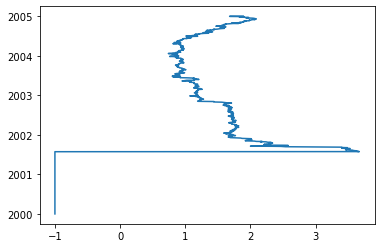

In [135]:
plt.plot(r['1 mo'],r['Date'])

In [153]:
r

Date  1 mo  2 mo  3 mo  6 mo  1 yr  2 yr  3 yr  5 yr  7 yr  10 yr  \
0   2000-01-03 -1.00  -1.0  5.48  5.81  6.09  6.38  6.42  6.50  6.65   6.58   
1   2000-01-04 -1.00  -1.0  5.43  5.75  6.00  6.30  6.34  6.40  6.56   6.49   
2   2000-01-05 -1.00  -1.0  5.44  5.74  6.05  6.38  6.43  6.51  6.68   6.62   
3   2000-01-06 -1.00  -1.0  5.41  5.69  6.03  6.35  6.39  6.46  6.63   6.57   
4   2000-01-07 -1.00  -1.0  5.38  5.66  6.00  6.31  6.35  6.42  6.58   6.52   
..         ...   ...   ...   ...   ...   ...   ...   ...   ...   ...    ...   
245 2004-12-27  1.90  -1.0  2.26  2.63  2.78  3.07  3.26  3.65  3.99   4.30   
246 2004-12-28  1.88  -1.0  2.25  2.62  2.77  3.08  3.27  3.66  4.00   4.31   
247 2004-12-29  1.76  -1.0  2.22  2.60  2.77  3.12  3.32  3.69  4.03   4.33   
248 2004-12-30  1.68  -1.0  2.22  2.59  2.76  3.10  3.27  3.64  3.97   4.27   
249 2004-12-31  1.89  -1.0  2.22  2.59  2.75  3.08  3.25  3.63  3.94   4.24   

     20 yr  30 yr  
0     6.94   6.61  
1     6.84   6.53  
2     6.95   6.64  
3     6.86   6.58  
4     6.82   6.55  
..     ...    ...  
245   4.95  -1.00  
246   4.94  -1.00  
247   4.96  -1.00  
248   4.92  -1.00  
249   4.85  -1.00  

[1249 rows x 13 columns]

In [123]:
data[0].columns

Index(['Date', '1 mo', '2 mo', '3 mo', '6 mo', '1 yr', '2 yr', '3 yr', '5 yr',
       '7 yr', '10 yr', '20 yr', '30 yr'],
      dtype='object')

In [1]:
# grab data : https://stackoverflow.com/questions/10556048/how-to-extract-tables-from-websites-in-python
# pickle : https://stackoverflow.com/questions/11218477/how-can-i-use-pickle-to-save-a-dict

import requests
import pandas as pd
import pickle
from matplotlib import pyplot as plt
import numpy as np

def grab_year(year):
    # Saves financial tables from a government website
    # The result is returned
    url = 'https://www.treasury.gov/resource-center/data-chart-center/interest-rates/pages/TextView.aspx?data=yieldYear&year='
    url_year = url + str(year)
    raw_html = requests.get(url_year).content
    df = pd.read_html(raw_html)[1]
    # df.to_csv('data_'+str(year)+'.csv') #another saving option
    return df

def scrape():
    # Collects the tables for a range of years
    # Saves the result as a pickle
    # Minimize the impact on the website by accessing the data only once
    # and saving it in a pickle file.
    data = [ grab_year(i) for i in range(2000,2022) ]
    with open('data.p', 'wb') as handle:
        pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)

def load_data(fn):
    # Load the pickle file from a filename
    # Return that
    pass

def get_date_changes(dates):
    # Returns a list of tuples from the dataframe dates column
    # The tuple will be [index of change, last two digits of year]
    #   The type will be a List[int, string]
    # Remember to include the start and end years
    
    df1 = pd.DataFrame([],columns=['indx','Year','Year_int'])
    d = [i.split('/')[2] for i in t]
    for id,val in enumerate(d):
        df1.loc[len(df1)] = [id,val,int(val)]

    df2 = df1.groupby('Year_int').min()
    return [tuple(i) for i in df2[['indx','Year']].values] #tolist()

def plot_data(cols, r):
    # Plot each of the columns in a loop using plt
    # Add the column name as a label
    pass

def plot_finalize(dc, r):
    # Set the xticks to the values from the date changes variable
    # Set x ticks to be every 1
    # Set the axis range to be reasonable
    #     Lower left should be the origin
    # Turn the grid on
    # Show the legend
    # Show (for testing)
    # Save (for submitting)
    pass

def wrangle():
    # Load the pickle data
    data = load_data('data.p')
    # Concatenate data frames and set NaN values to -1 with fillna
    r = pd.concat(data).fillna(-1)
    # Get column names
    cols = data[0].columns
    # Get times the year changed
    dc = get_date_changes(r[cols[0]].values)

    # Plot 
    plot_data(cols, r)
    plot_finalize(dc, r)

    # Visually cross verify the 30 yr with the following link
    # https://www.macrotrends.net/2521/30-year-treasury-bond-rate-yield-chart

if __name__ == "__main__":
    # This is idiomatic for the main function
    # Notice how there's no code in the global scope except for import statements
    # Notice how the functions are short and do only 1 small thing
    # Try to follow these programming practices
        # Only imports, functions, and decorators (@jit, etc) in global scope
        # Short functions
        # Deterministic functions which compute then return
        # Write tests when sensible (not required for this assignment)

    # This has been commented out (as a courtesy to minimize load)
    # scrape() the data is already included

    # You'll be implementing some minor functions to plot the data
    wrangle()

TypeError: ignored